# Sales Analysis

In [166]:
import pandas as pd
import os
import matplotlib.pyplot as plt
from itertools import combinations
from collections import Counter

## Merge 12 months of sales sdata into a single csv file

In [2]:
files = [file for file in os.listdir('./dataset')]

totdata = pd.DataFrame()

for file in files:
    df = pd.read_csv("./dataset/" + file)
    totdata = pd.concat([totdata, df])
    

totdata.to_csv("totdata.csv", index=False)

In [239]:
totdata = pd.read_csv("totdata.csv")
totdata.head(60)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Unnamed: 0
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001",NaN
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001",NaN
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",NaN
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",NaN
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",NaN
5,295670,AA Batteries (4-pack),1,3.84,12/31/19 22:58,"200 Jefferson St, New York City, NY 10001",NaN
6,295671,USB-C Charging Cable,1,11.95,12/16/19 15:10,"928 12th St, Portland, OR 97035",NaN
7,295672,USB-C Charging Cable,2,11.95,12/13/19 09:29,"813 Hickory St, Dallas, TX 75001",NaN
8,295673,Bose SoundSport Headphones,1,99.99,12/15/19 23:26,"718 Wilson St, Dallas, TX 75001",NaN
9,295674,AAA Batteries (4-pack),4,2.99,12/28/19 11:51,"77 7th St, Dallas, TX 75001",NaN


# Cleaning the data 

In [240]:
#totdata = totdata.drop(columns='Unnamed: 0')

# Drop NaN rows

In [241]:
nan_df = totdata[totdata.isna().any(axis=1)]   #finds nan values across dataframe

totdata = totdata.dropna(how='all') #drops all nan values in dataframe

# Question 1: What was the best month for sales? How much was earned that month?

In [242]:
#totdata['month'] = totdata['Order Date'].str[0:2]   
#totdata['month'] = totdata['month'].astype('int32') #returns error -- need to clean up wrong values 'Or'

In [243]:
totdata = totdata[totdata['Order Date'].str[0:2] != 'Or'] ## filters out wrong values 'Or'in 'Order Date' to avoid previous error

totdata['month'] = totdata['Order Date'].str[0:2]  #strips first 2 characters of values in 'Order Date'

totdata['month'] = totdata['month'].astype('int32') # Converts str to int in month column


In [244]:
totdata['Quantity Ordered'] = pd.to_numeric(totdata['Quantity Ordered'])

totdata['Price Each'] = pd.to_numeric(totdata['Price Each'])

In [245]:
totdata['Sales'] = totdata['Quantity Ordered'] * totdata['Price Each']  #calculates total sales 

totdata

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,Sales
0,295665,Macbook Pro Laptop,1,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",12,1700.00
1,295666,LG Washing Machine,1,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12,600.00
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12,11.95
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12,149.99
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12,11.95
...,...,...,...,...,...,...,...,...
186845,222905,AAA Batteries (4-pack),1,2.99,06/07/19 19:02,"795 Pine St, Boston, MA 02215",6,2.99
186846,222906,27in FHD Monitor,1,149.99,06/01/19 19:29,"495 North St, New York City, NY 10001",6,149.99
186847,222907,USB-C Charging Cable,1,11.95,06/22/19 18:57,"319 Ridge St, San Francisco, CA 94016",6,11.95
186848,222908,USB-C Charging Cable,1,11.95,06/26/19 18:35,"916 Main St, San Francisco, CA 94016",6,11.95


In [246]:
results = totdata.groupby(['month']).sum() #groups by month and sums sales

results

,Quantity Ordered,Price Each,Sales
month,,,
1,10903,1.811768e+06,1.822257e+06
2,13449,2.188885e+06,2.202022e+06
3,17005,2.791208e+06,2.807100e+06
4,20558,3.367671e+06,3.390670e+06
5,18667,3.135125e+06,3.152607e+06
6,15253,2.562026e+06,2.577802e+06
7,16072,2.632540e+06,2.647776e+06
8,13448,2.230345e+06,2.244468e+06
9,13109,2.084992e+06,2.097560e+06


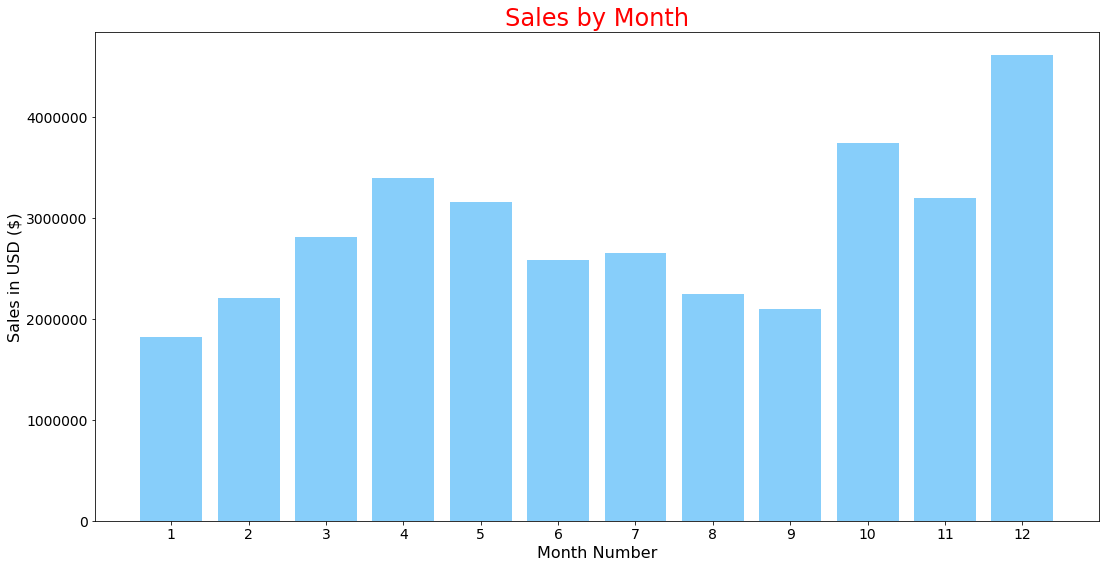

In [252]:
months = range(1, 13)


plt.figure(figsize=(18,9))
plt.bar(months, results['Sales'], color='lightskyblue')
plt.xticks(months, size =14)
plt.yticks(size =14)
plt.title('Sales by Month', size=24, color='r')
plt.xlabel('Month Number', size=16)
plt.ylabel('Sales in USD ($)', size=16)

plt.show()

# What City had the highest number of sales?

In [253]:
def get_city(address):
    return address.split(',')[1]  #function to get city from address column  

def get_state(address):
    return address.split(',')[2].split(' ')[1] #function to get Sate without zip code from address column
    
    
totdata['city'] = totdata['Purchase Address'].apply(lambda x: f"{get_city(x)} ({get_state(x)})") #creates new column adding city and State from address column

#totdata['city'] = totdata['Purchase Address'].str.split(',').apply(lambda x: x[1]) #my way to get city
totdata

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,Sales,city
0,295665,Macbook Pro Laptop,1,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",12,1700.00,New York City (NY)
1,295666,LG Washing Machine,1,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12,600.00,New York City (NY)
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12,11.95,New York City (NY)
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco (CA)
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta (GA)
...,...,...,...,...,...,...,...,...,...
186845,222905,AAA Batteries (4-pack),1,2.99,06/07/19 19:02,"795 Pine St, Boston, MA 02215",6,2.99,Boston (MA)
186846,222906,27in FHD Monitor,1,149.99,06/01/19 19:29,"495 North St, New York City, NY 10001",6,149.99,New York City (NY)
186847,222907,USB-C Charging Cable,1,11.95,06/22/19 18:57,"319 Ridge St, San Francisco, CA 94016",6,11.95,San Francisco (CA)
186848,222908,USB-C Charging Cable,1,11.95,06/26/19 18:35,"916 Main St, San Francisco, CA 94016",6,11.95,San Francisco (CA)


In [254]:
results = totdata.groupby(['city']).sum() #groups by month and sums sales

results

,Quantity Ordered,Price Each,month,Sales
city,,,,
Atlanta (GA),16602,2.779908e+06,104794,2.795499e+06
Austin (TX),11153,1.809874e+06,69829,1.819582e+06
Boston (MA),22528,3.637410e+06,141112,3.661642e+06
Dallas (TX),16730,2.752628e+06,104620,2.767975e+06
Los Angeles (CA),33289,5.421435e+06,208325,5.452571e+06
New York City (NY),27932,4.635371e+06,175741,4.664317e+06
Portland (ME),2750,4.471893e+05,17144,4.497583e+05
Portland (OR),11303,1.860558e+06,70621,1.870732e+06
San Francisco (CA),50239,8.211462e+06,315520,8.262204e+06


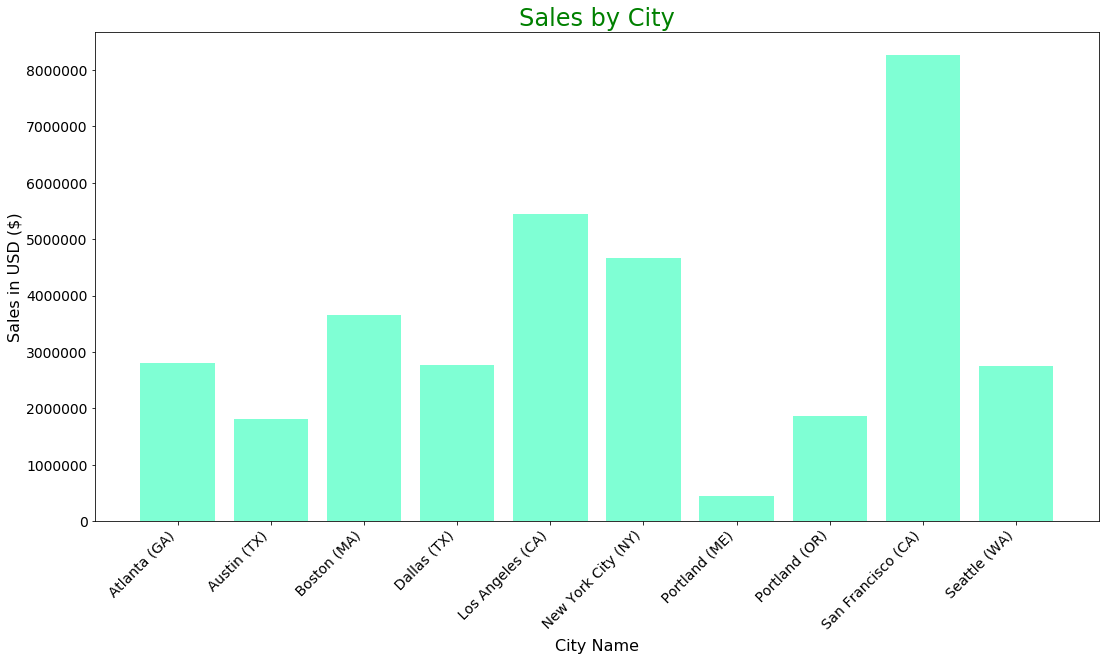

In [258]:
cities = [city for city, df in totdata.groupby('city')]

plt.figure(figsize=(18,9))
plt.bar(cities, results['Sales'], color='aquamarine')
plt.xticks(rotation=45, ha='right', size=14)
plt.yticks(size=14)
plt.title('Sales by City', size=24, color='green')
plt.xlabel('City Name', size=16)
plt.ylabel('Sales in USD ($)', size=16)

plt.show()

# What time should we display advertisiments to maximise likelyhood of the customer buying the product?

In [259]:
totdata['Order Date'] = pd.to_datetime(totdata['Order Date'])

totdata['hour'] = totdata['Order Date'].dt.hour

totdata['minute'] = totdata['Order Date'].dt.minute


#totdata['time'] = totdata['Order Date'].str.split(' ').apply(lambda x: x[1])  my solution
totdata

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,Sales,city,hour,minute
0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.00,New York City (NY),0,1
1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.00,New York City (NY),7,3
2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,11.95,New York City (NY),18,21
3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco (CA),15,13
4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta (GA),12,38
...,...,...,...,...,...,...,...,...,...,...,...
186845,222905,AAA Batteries (4-pack),1,2.99,2019-06-07 19:02:00,"795 Pine St, Boston, MA 02215",6,2.99,Boston (MA),19,2
186846,222906,27in FHD Monitor,1,149.99,2019-06-01 19:29:00,"495 North St, New York City, NY 10001",6,149.99,New York City (NY),19,29
186847,222907,USB-C Charging Cable,1,11.95,2019-06-22 18:57:00,"319 Ridge St, San Francisco, CA 94016",6,11.95,San Francisco (CA),18,57
186848,222908,USB-C Charging Cable,1,11.95,2019-06-26 18:35:00,"916 Main St, San Francisco, CA 94016",6,11.95,San Francisco (CA),18,35


In [260]:
hourresults = totdata.groupby(['hour']).count().sort_values('Sales', ascending=False) #groups by hour and sorts by highest sales number

hourresults

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,Sales,city,minute
hour,,,,,,,,,,
19,12905,12905,12905,12905,12905,12905,12905,12905,12905,12905
12,12587,12587,12587,12587,12587,12587,12587,12587,12587,12587
11,12411,12411,12411,12411,12411,12411,12411,12411,12411,12411
18,12280,12280,12280,12280,12280,12280,12280,12280,12280,12280
20,12228,12228,12228,12228,12228,12228,12228,12228,12228,12228
13,12129,12129,12129,12129,12129,12129,12129,12129,12129,12129
14,10984,10984,10984,10984,10984,10984,10984,10984,10984,10984
10,10944,10944,10944,10944,10944,10944,10944,10944,10944,10944
21,10921,10921,10921,10921,10921,10921,10921,10921,10921,10921


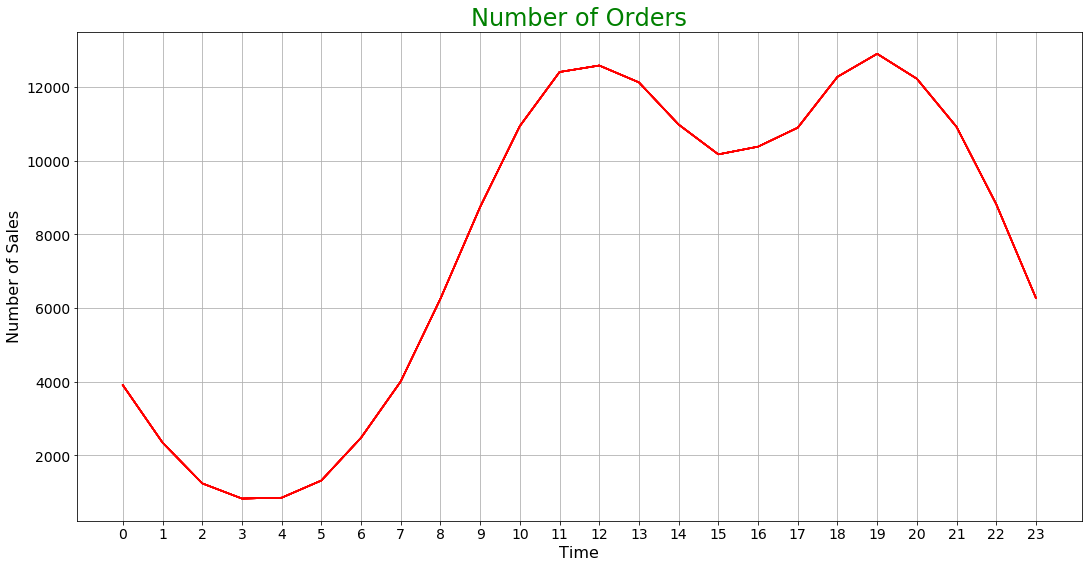

In [263]:
hours = [hour for hour, df in totdata.groupby('hour')]

plt.figure(figsize=(18,9))
plt.plot(hours, totdata.groupby('hour').count(), color='red')
plt.xticks(hours, size =14)
plt.yticks(size =14)
plt.grid()
plt.title('Number of Orders', size=24, color='green')
plt.xlabel('Time', size=16)
plt.ylabel('Number of Sales', size=16)

plt.show()

# What products are most often sold together?

In [264]:
df = totdata[totdata['Order ID'].duplicated(keep=False)]  ### new dataframe only including duplicated order IDs

df['order group'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x)) ###new column concatenates products with same order ID

df = df[['Order ID', 'order group']].drop_duplicates() ### now we can keep only one order ID. Dropping the duplicates

df

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Order ID,order group
16,295681,"Google Phone,USB-C Charging Cable,Bose SoundSp..."
36,295698,"Vareebadd Phone,USB-C Charging Cable"
42,295703,"AA Batteries (4-pack),Bose SoundSport Headphones"
66,295726,"iPhone,Lightning Charging Cable"
76,295735,"iPhone,Apple Airpods Headphones,Wired Headphones"
...,...,...
186798,222863,"27in FHD Monitor,Bose SoundSport Headphones"
186804,222868,"iPhone,Apple Airpods Headphones"
186819,222882,"Apple Airpods Headphones,AA Batteries (4-pack)"
186822,222884,"Google Phone,USB-C Charging Cable"


In [265]:
count = Counter()

for row in df['order group']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))  ### 2 items most commonly sold together
    
for key, value in count.most_common(10):
    print(key, value)

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


# What product sold the most?

In [266]:
totdata.groupby(['Product']).sum().sort_values('Quantity Ordered', ascending=False)


,Quantity Ordered,Price Each,month,Sales,hour,minute
Product,,,,,,
AAA Batteries (4-pack),31017,61716.59,146370,92740.83,297332,612113
AA Batteries (4-pack),27635,79015.68,145558,106118.40,298342,609039
USB-C Charging Cable,23975,261740.85,154819,286501.25,314645,647586
Lightning Charging Cable,23217,323787.10,153092,347094.15,312529,634442
Wired Headphones,20557,226395.18,133397,246478.43,271720,554023
Apple Airpods Headphones,15661,2332350.00,109477,2349150.00,223304,455570
Bose SoundSport Headphones,13457,1332366.75,94113,1345565.43,192445,392603
27in FHD Monitor,7550,1125974.93,52558,1132424.50,107540,219948
iPhone,6849,4789400.00,47941,4794300.00,98657,201688


In [267]:
product_group = totdata.groupby(['Product']) ### groups by product

quantity = product_group.sum()['Quantity Ordered'] ### sums up quantities

products = [product for product, df in product_group]

prices = totdata.groupby('Product').mean()['Price Each']


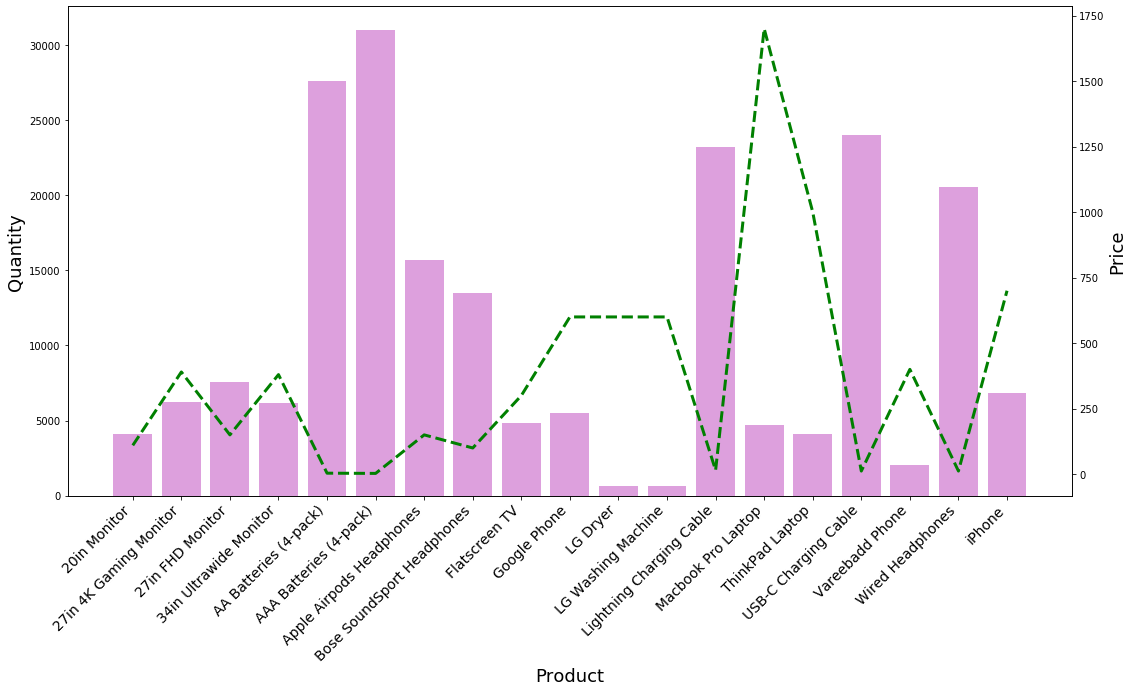

In [273]:
fig, ax1 = plt.subplots(figsize=(18,9))
ax2 = ax1.twinx()

ax1.bar(products, quantity, color='plum')
ax2.plot(products, prices, 'g--', linewidth=3)

ax1.set_xticklabels(products, rotation = 45, ha='right', size=14)

ax1.set_xlabel('Product', size=18)
ax1.set_ylabel('Quantity', size=18)
ax2.set_ylabel('Price', size=18)

plt.show()